In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
data = pd.read_excel("Project\spam_message.xlsx")
data.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
data.isnull().sum().sum()

0

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     5572 non-null   object
 1   messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [25]:
data.describe()

,label,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


### EDA

Total ham :  4825
Total spam :  747


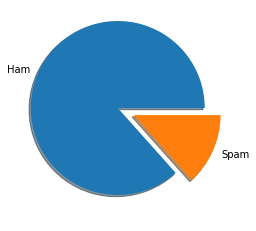

In [26]:
lenham = len(data["label"][data.label=="ham"])
lenspam = len(data["label"][data.label=="spam"])

arr = np.array([lenham,lenspam])
labels = ['Ham','Spam']
print('Total ham : ',lenham)
print('Total spam : ',lenspam)

plt.pie(arr, labels=labels, explode=[0.2,0.0], shadow=True)
plt.show()

### Text Preprocessing

In [27]:
def text_preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000",'m').replace(',000','k').replace('`',"''").replace("won't","will not").replace("cannot","can not").replace("can't","can not").replace("n't","not").replace("what's","what is").replace("he's","he is").replace("she is","she is").replace("it's","it is").replace("i'm","i am").replace("'re'","are").replace("'ve'","have").replace("'s'","own").replace("%","percent").replace("$","dollar").replace("'ll'","will")
    
    return x

data["Preprocessed Text"] = data["messages"].apply(lambda x: text_preprocess(x))
data.head()

,label,messages,Preprocessed Text
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ..."
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i donot think he goes to usf, he lives aro..."


### Data Development

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

X_train,X_test,y_train,y_test = train_test_split(data['messages'],data['label'],random_state=1)

count_vector = CountVectorizer()

training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

### Model Development

In [30]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB()

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

predictions = naive_bayes.predict(testing_data)

print("Accuracy Score : ", format(accuracy_score(y_test,predictions)))
print("Precision Score : ", format(precision_score(y_test,predictions)))
print("Recall Score : ", format(recall_score(y_test,predictions)))
print("F1 Score : ", format(F1_score(y_test,predictions)))

Accuracy Score :  0.9856424982053122


ValueError: pos_label=1 is not a valid label. It should be one of ['ham', 'spam']